# Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

import warnings
warnings.filterwarnings('ignore')

# Dataset

In [46]:
project_df= pd.read_csv('/content/UpdatedResumeDataSet 2.csv')
project_df.head()
project_df['cleaned_resume'] = ''
project_df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


# Exploratory Data Analysis


In [5]:
project_df.shape

(962, 3)

In [6]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [7]:
project_df.isnull().sum()

Category          0
Resume            0
cleaned_resume    0
dtype: int64

In [8]:
project_df.describe().transpose()

,count,unique,top,freq
Category,962,25,Java Developer,84
Resume,962,166,"Technical Skills Web Technologies: Angular JS,...",18
cleaned_resume,962,1,,962


In [9]:
project_df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [10]:
category = project_df['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


# Visualization of Data

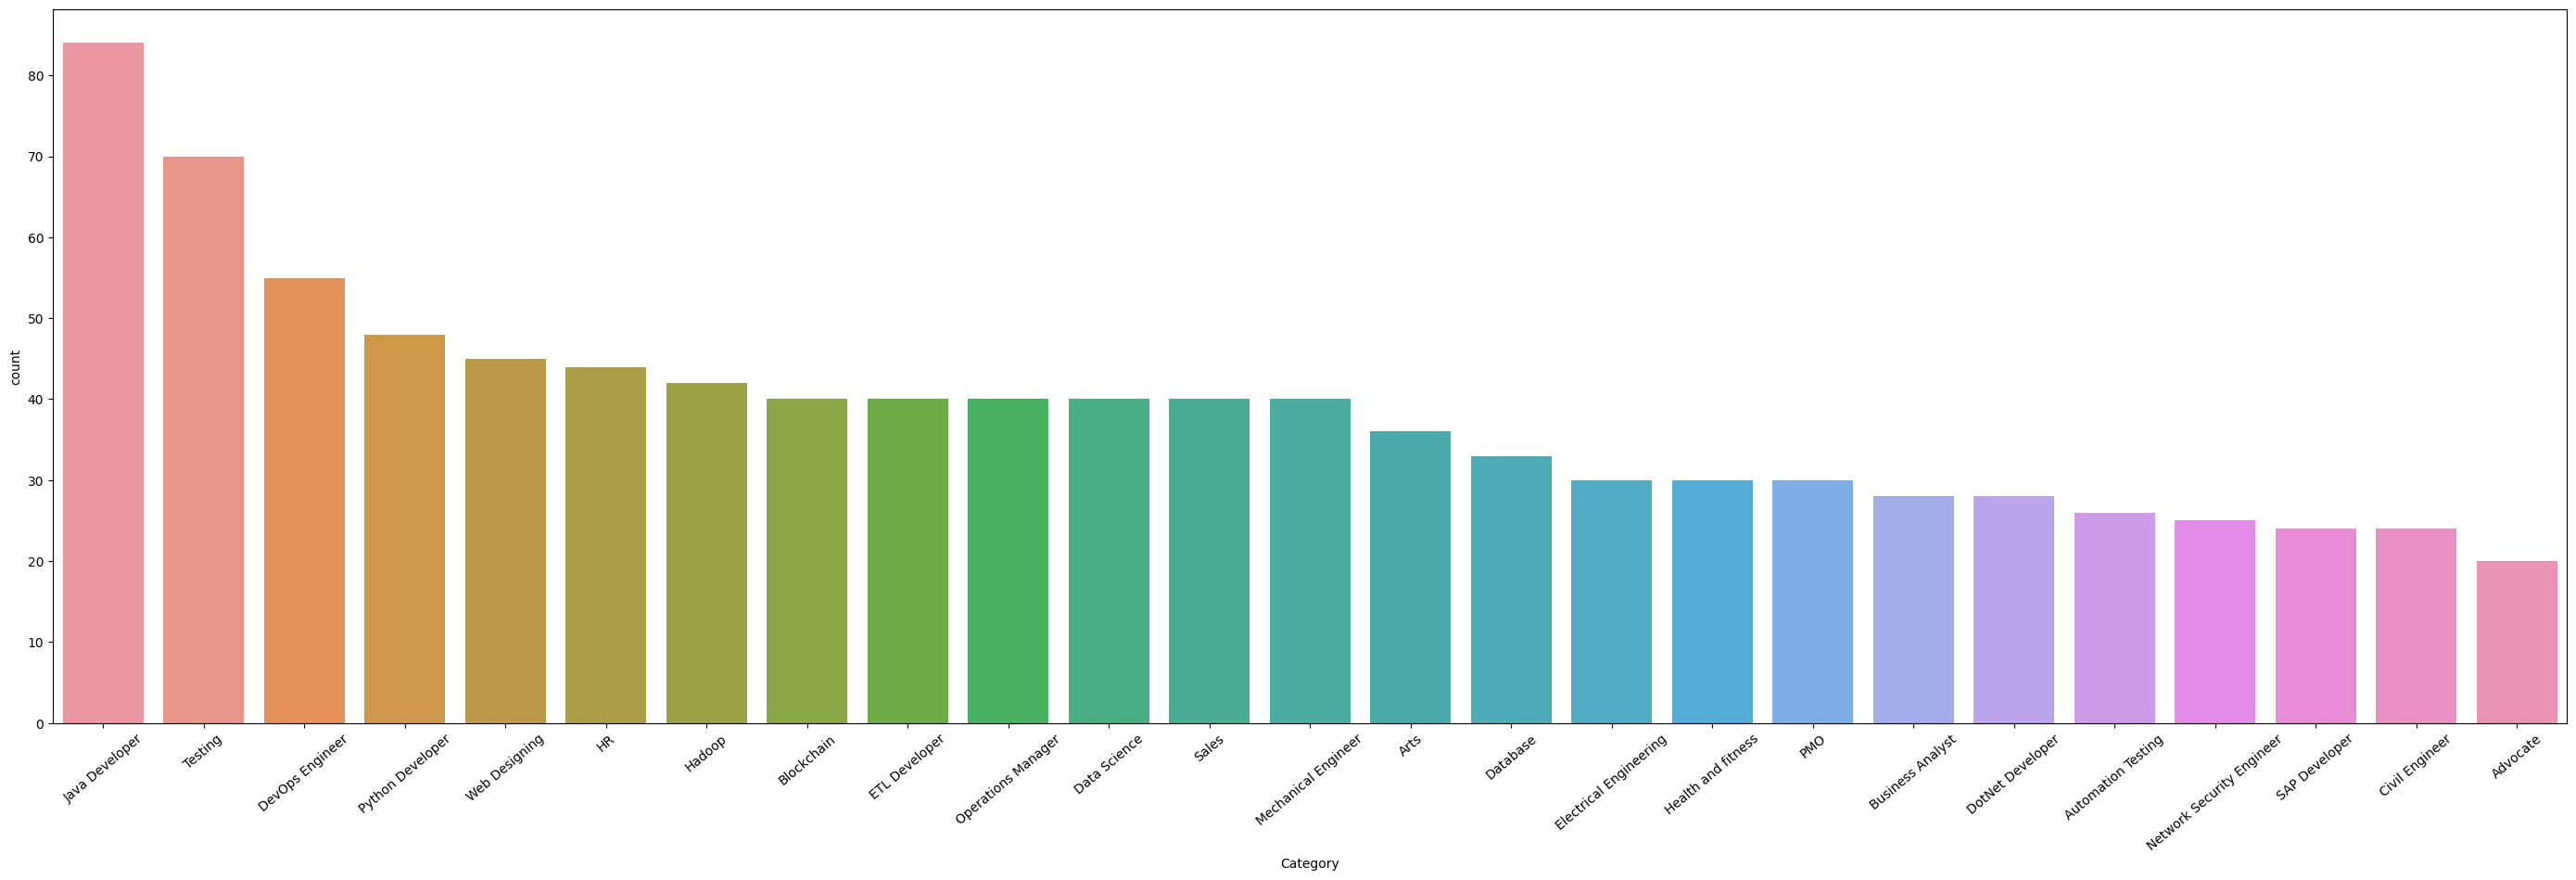

In [75]:
plt.figure(figsize=(35,10))
plt.xticks(rotation=40)
#  single categorical variable
sns.countplot(x ='Category', data= project_df, order= project_df['Category'].value_counts().index)
 
# Show the plot
plt.show()

In [12]:
px.bar(data_frame=project_df, x=project_df.Category, color=project_df.Category)

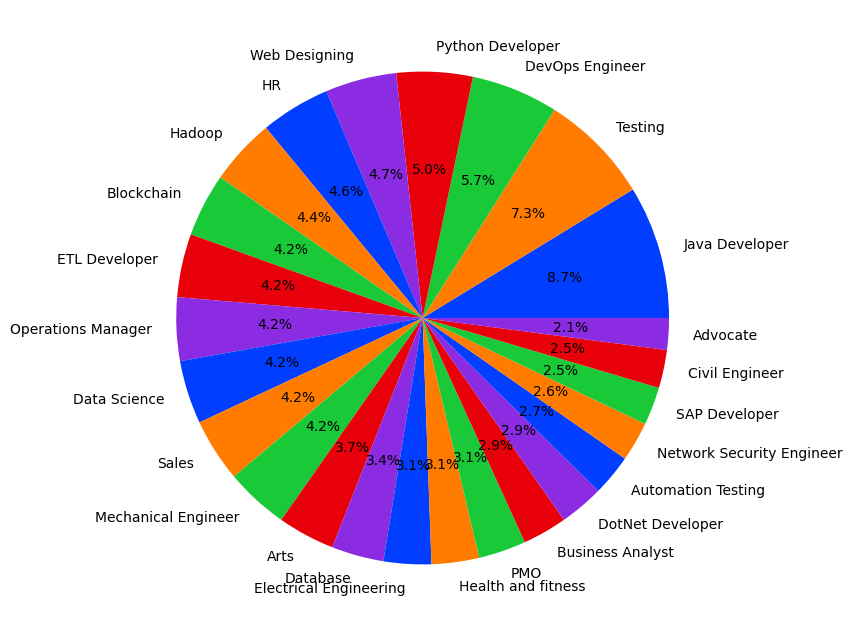

In [76]:
plt.figure(figsize=(25,8))
colors= sns.color_palette('bright')[0:5]

#code for pie chart
plt.pie(category['Category'], labels= category['index'], colors = colors, autopct='%.1f%%')
plt.show()

#  Preprocessing using NLP

In [77]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # Remove the URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # Remove the RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # Remove the hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # Remove the mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove the extra whitespace
    return resumeText

In [78]:
project_df['cleaned'] = project_df['Resume'].apply(lambda x:cleanResume(x))
project_df.head()

,Category,Resume,cleaned_resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",,Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",,Education Details MCA YMCAUST Faridabad Haryan...


In [79]:
#getting all the resume text
corpus=" "
for i in range(0,len(project_df)):
    corpus= corpus+ project_df["cleaned"][i]

In [80]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#provide the Token to the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

411913

In [83]:
#convert into the lower case
words = []
for word in tokens:
    words.append(word.lower())
words[0:5]


['skills', 'programming', 'languages', 'python', 'pandas']

In [85]:
# encoding the data
label = LabelEncoder()
project_df['new_Category'] = label.fit_transform(project_df['Category'])
project_df.head()

,Category,Resume,cleaned_resume,cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",,Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",,Education Details MCA YMCAUST Faridabad Haryan...,6


(array([ 82.,  68.,  97.,  83.,  70., 116., 124.,  95.,  72., 155.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

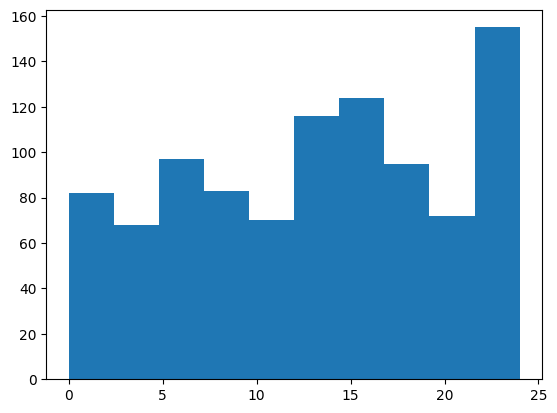

In [86]:
plt.hist(project_df['new_Category'])

In [22]:
# Vectorizing the cleaned columns
text = project_df['cleaned'].values
target = project_df['new_Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

In [23]:
WordFeatures.shape

(962, 1500)

In [24]:
print(WordFeatures)

  (0, 1497)	0.030442872257393377
  (0, 1484)	0.034531750632907525
  (0, 1482)	0.1138465211736939
  (0, 1460)	0.07093131129419672
  (0, 1451)	0.033309013428457386
  (0, 1442)	0.03203670321153616
  (0, 1440)	0.08546898208818157
  (0, 1439)	0.04080461724681855
  (0, 1436)	0.05680440806960008
  (0, 1420)	0.04659756799177676
  (0, 1419)	0.0503923714674369
  (0, 1389)	0.08368776039571268
  (0, 1388)	0.11957568503304351
  (0, 1382)	0.0636917041233275
  (0, 1376)	0.1487996917738002
  (0, 1371)	0.06899078914578757
  (0, 1365)	0.0531162184530022
  (0, 1364)	0.0815286030249583
  (0, 1362)	0.05813765391929385
  (0, 1358)	0.025538351209887553
  (0, 1344)	0.1499576218829958
  (0, 1343)	0.05681550781284476
  (0, 1309)	0.0646209141904646
  (0, 1299)	0.05319383005661842
  (0, 1286)	0.0346379947929267
  :	:
  (961, 336)	0.13437601229264157
  (961, 317)	0.06693311287776045
  (961, 315)	0.08639977563211801
  (961, 272)	0.025466251941105137
  (961, 258)	0.082314549875185
  (961, 243)	0.10857982774459495
  

In [30]:
project_df_copy = project_df.copy()

In [31]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:


oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = project_df['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


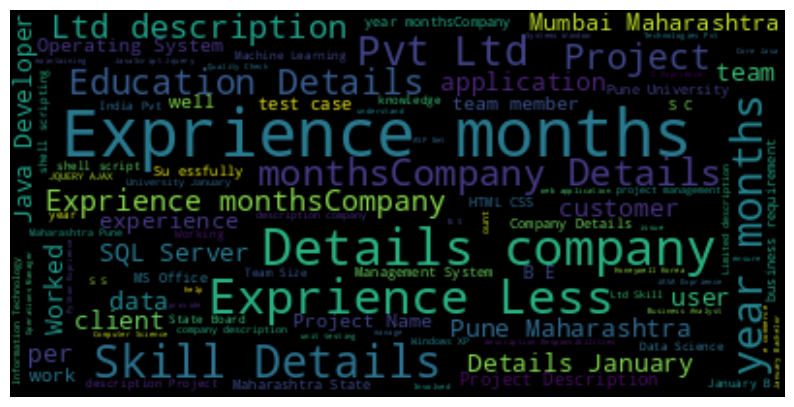

In [34]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    project_df[i] = le.fit_transform(project_df[i])

In [36]:
project_df.head()

,Category,Resume,cleaned_resume,cleaned,new_Category
0,6,Skills * Programming Languages: Python (pandas...,,Skills Programming Languages Python pandas num...,6
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,,Education Details May 2013 to May 2017 B E UIT...,6
2,6,"Areas of Interest Deep Learning, Control Syste...",,Areas of Interest Deep Learning Control System...,6
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",,Education Details MCA YMCAUST Faridabad Haryan...,6


In [37]:
project_df.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [38]:
project_df_copy.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

# Train Test Data and Modeling

In [87]:
# Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.3)

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((673, 1500), (289, 1500), (673,), (289,))

In [39]:
del project_df_copy

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [51]:
Text= project_df['cleaned_resume'].values
Target= project_df['Category'].values

In [67]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [90]:
model_resume = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier()    
}

In [91]:
model_resume_list=[]
for model in model_resume.values():
    model_resume_list.append(OneVsRestClassifier(model))
model_resume_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=RandomForestClassifier())]

In [102]:
print("The 2 Estimator we used:")
print("1.KNeighborsClassifier\n2.RandomForestClassifier\n")
for i in model_resume_list:
    i.fit(X_train, y_train)
    print(f'{i} is trained')




The 2 Estimator we used:
1.KNeighborsClassifier
2.RandomForestClassifier

OneVsRestClassifier(estimator=KNeighborsClassifier()) is trained
OneVsRestClassifier(estimator=RandomForestClassifier()) is trained


In [103]:
for count, value in enumerate(model_resume_list):
    print(f"Accuracy of {value} on training set :", model_resume_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_resume_list[count].score(X_test, y_test))
    print("-"*100)
    print("\n")



Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.9895988112927192
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.9757785467128027
----------------------------------------------------------------------------------------------------


Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on test set : 0.9930795847750865
----------------------------------------------------------------------------------------------------




In [57]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [94]:
for count, value in enumerate(model_resume_list):
    print(f'{value} classification report')
    print("-"*80)
    print(classification_report(y_test, model_resume_list[count].predict(X_test)))
    print("*"*100)
    print(" ")

OneVsRestClassifier(estimator=KNeighborsClassifier()) classification report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       1.00      1.00      1.00        16
           2       1.00      0.80      0.89        10
           3       1.00      1.00      1.00        11
           4       0.75      1.00      0.86         6
           5       1.00      1.00      1.00         6
           6       1.00      0.79      0.88        14
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00        10
          11       0.83      1.00      0.91        10
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        10
          14       1.00      1.0

# Cross Validation

In [95]:
from sklearn.model_selection import cross_val_score, KFold

In [96]:
results = {}

kf = KFold(n_splits= 10)

for count, value in enumerate(model_resume_list):
    resume_result = cross_val_score(model_resume_list[count], X_train, y_train, scoring= 'accuracy', cv= kf)
    results[value] = resume_result

In [104]:
print("r2 scores")
print("--------------------")
for name, resume_result in results.items():
   
    print(f'{name} : {round(np.mean(resume_result),3)}')
    print("----------------")

r2 scores
--------------------
OneVsRestClassifier(estimator=KNeighborsClassifier()) : 0.966
----------------
OneVsRestClassifier(estimator=RandomForestClassifier()) : 0.988
----------------


# Results

In [62]:
from google.colab import files

In [98]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Load the data
project_df = pd.read_csv("https://raw.githubusercontent.com/Achyut2995/informationretrieval1/main/ResumeDataSet.csv", encoding="utf-8")

# Drop any rows with missing values
project_df.dropna(inplace=True)

# Create a feature matrix and target vector
X = project_df["Resume"]
y = project_df["Category"]

# Feature Extraction
resume = CountVectorizer(stop_words="english")
X_resume = resume.fit_transform(X)

tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X_resume)

# Model Training
clf = MultinomialNB()
clf.fit(X_tfidf, y)

# Predict on new data
new_resume = "I have an experience in Auto CAD"
new_resume = resume.transform([new_resume])
new_tfidf = tfidf.transform(new_resume)
predicted_category = clf.predict(new_tfidf)

print("Predicted Category:", predicted_category[0])


Predicted Category: Mechanical Engineer


In [100]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Load the data
project_df = pd.read_csv("https://raw.githubusercontent.com/Achyut2995/informationretrieval1/main/ResumeDataSet.csv", encoding="utf-8")

# Drop any rows with missing values
project_df.dropna(inplace=True)

# Create a feature matrix and target vector
X = project_df["Resume"]
y = project_df["Category"]

# Feature Extraction
resume = CountVectorizer(stop_words="english")
X_resume = resume.fit_transform(X)

tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X_resume)

# Model Training
clf = MultinomialNB()
clf.fit(X_tfidf, y)

# Predict on new data
#new_resume = "ORACLE DBA."
# Upload a file to the Colab environment
uploaded_file = files.upload()

# Get the name of the uploaded file
file_name = next(iter(uploaded_file))

# Print the contents of the file
with open('/content/file_name/file_name', 'r', encoding='utf-8', errors='ignore') as f:
    print(f.read())
new_resume = resume.transform([file_name])
new_tfidf = tfidf.transform(new_resume)
predicted_category = clf.predict(new_tfidf)

print("Predicted Category:", predicted_category[0])


Saving Madan_Prajuli_DS.docx to Madan_Prajuli_DS.docx

Predicted Category: Java Developer


In [101]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from google.colab import files
import io

# Load the data
project_df = pd.read_csv("https://raw.githubusercontent.com/Achyut2995/informationretrieval1/main/ResumeDataSet.csv", encoding="utf-8")

# Drop any rows with missing values
project_df.dropna(inplace=True)

# Create a feature matrix and target vector
X = project_df["Resume"]
y = project_df["Category"]

# Feature Extraction
resume = CountVectorizer(stop_words="english")
X_resume = resume.fit_transform(X)

tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X_resume)

# Model Training
clf = MultinomialNB()
clf.fit(X_tfidf, y)

# Ask the user to upload a file
uploaded_file = files.upload()

# Get the name of the uploaded file
file_name = next(iter(uploaded_file))

# Read the contents of the file
# Read the contents of the file with the 'latin-1' encoding
file_content = uploaded_file[file_name].decode("latin-1")

# Make a prediction on the uploaded file
new_resume = resume.transform([file_content])
new_tfidf = tfidf.transform(new_resume)
predicted_category = clf.predict(new_tfidf)

# Display the predicted category
print("Predicted Category:", predicted_category[0])



Saving AmanSranResume (1).docx to AmanSranResume (1) (2).docx
Predicted Category: Testing
